(The top part of this notebook is an explanation of bias-variance, the bottom is the code to generate the figures in the notebook.)

You learned bias-variance wrong.

I have a bone to pick with the way that I was taught bias-variance and I bet it's the way you were taught as well.  You probably saw this graphic:

<img src="https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg" style="float: left; margin: 20px; height: 55px">


The problem here is that it's showing high bias or high variance outcomes while in statistical modeling or machine learning what we care about is high bias or high variance coefficients.  To understand that, look at a chart that illustrates bias and variance in coefficients:

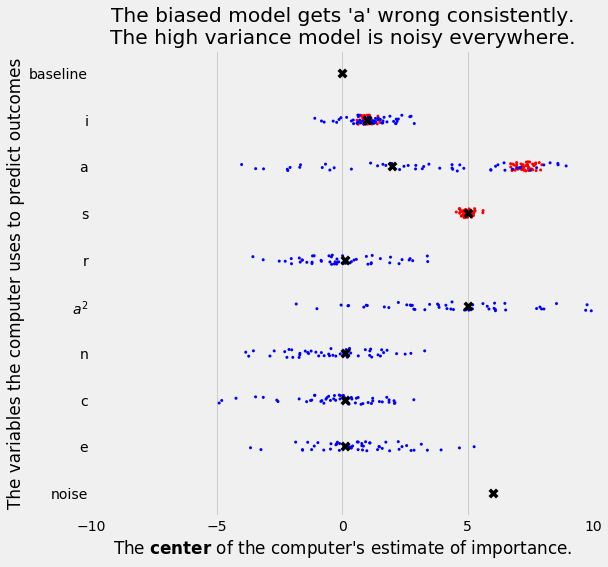

In [47]:
fig

This chart is showing two different models, a biased model in red and a high variance model in blue and the true values shown in black Xs.  First, let's look at the Xs

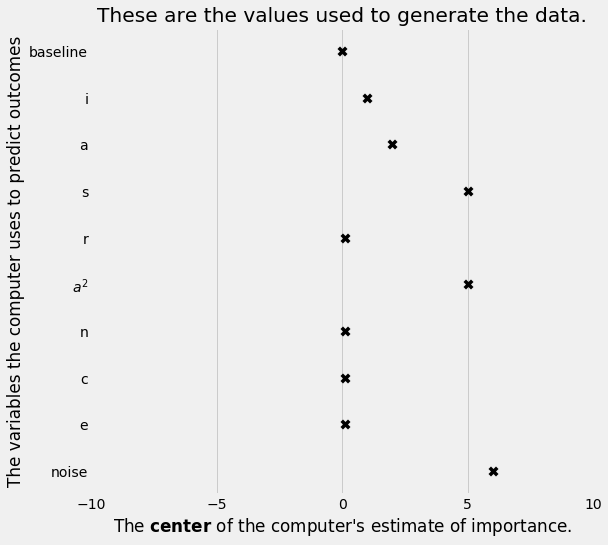

In [48]:
fig0

For this exercise I simulated 50 samples of 40 datapoints.  To make this simulated data I generated a bunch of independent variables and calculated the predictor from them plus some random noise.  The model to calculate them is shown by those Xs.  Writing it out, the model was:

Y = i + 2*a + 5*a2 +5*s + 0.1* r + 0.1 *n + 0.1* c + 0.1 * e + 6* ε

For instance the X in the row labeled "s" is at positive 5.  That's because I added 5*s to my Y value.  Doing this for all the coefficients (plus a "random noise" term ε) is how the Y values were generated.  Machine learning is about figuring out relationships like these.  So when we fit a model, we are trying to guess where those Xs are.  But in this case I'm deliberately making two bad models.  First let's consider the biased model:

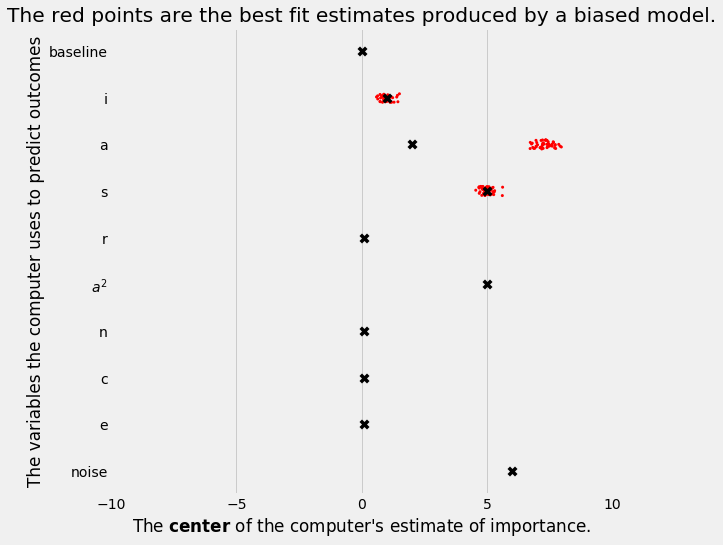

In [49]:
fig1


This model found predictions "b" using the equation:

b = $i*\beta_{1} + a*\beta_{2} + s*\beta_{3}$ (And yes, they do spell out bias.  That's for a mneumonic you can use after I explain both models).

This only has three terms so it ommits important information which produces a biased model.  This bias is shown by the gap between the red dots and the true value.  The model keeps telling me that the relationship between b and a is that when a goes up by 1, b goes up by 7.  In actuality, when a goes up by 1, b goes up by 2.  That's bias.

Now you might think well if there is a systematic bias, the dart picture was actually not that bad.  My predictions are always going to be missing in the same direction.  Well actually... no they wont.  Look at this graph of residuals (i.e. amount your estimates are off by):


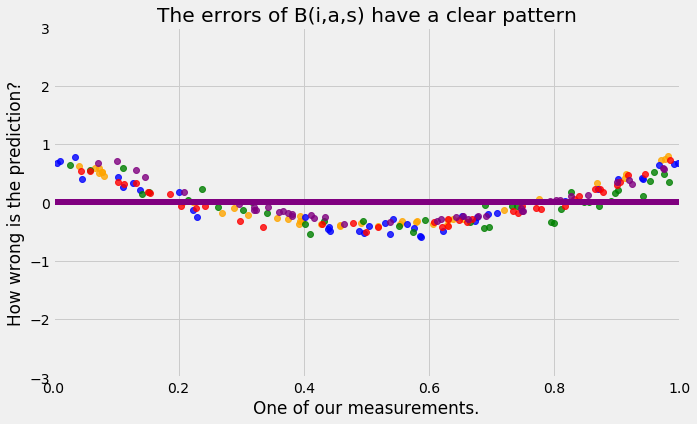

In [40]:
fig3

Here the residuals are above 0, your predictions are too low.  Where they are below 0, your predictions are too high.  That's because the term I'm ommitting is $a^{2}$, an exponential term.  The model tries to compensate by using the $a$ variable but simulating an exponential term with a linear value will always be problematic.  As you can see there is a consitent trend but it's not like the darts, always missing in the same direction.  In fact the average miss of a prediction is 0.  It's important to get this point, the systematic error is that our coefficients will always be off in the same way, not that our estimates will always be off in the same way.

Now, let's look at the variance chart:

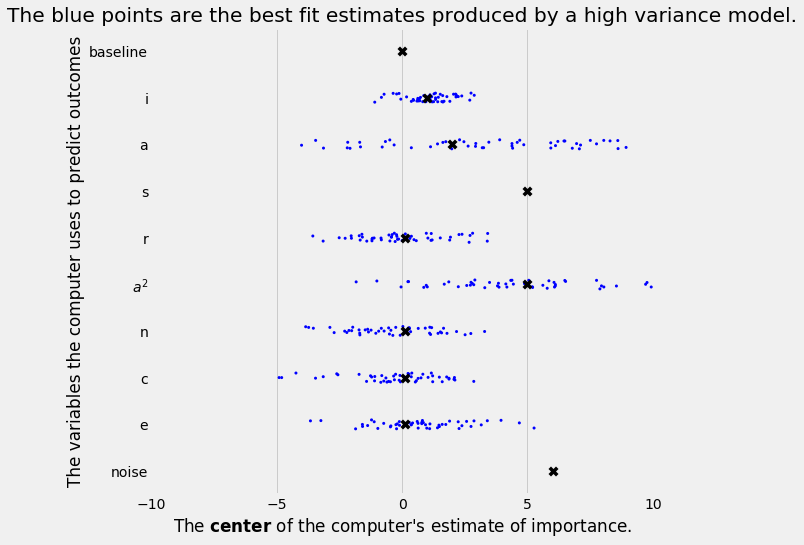

In [44]:
fig2


This is a model that made predictions "v" using the equation:

$v = a*\beta_{1} + r*\beta_{2} + i*\beta_{3} + a^{2}*\beta_{4} + n*\beta_{5} + c*\beta_{6} + e*\beta_{7}$ (And yes, these spell out variance.  Remeber that for later).

This model was flawed because I ommitted the term "s" which was important to the generation process.  However I included a bunch of terms with very little predictive power: r, n, c and e.  What will happen is that variation in the bad predictors will sometimes randomly match the variation in our ommitted term.  When these spurious correlations happen, the model with give importance to the bad predictors, thinking they explain the variation that is actually being cause by the ommitted term.  As a result, the estimates for the importance of these terms vary enormously.  And because the model uses all the terms, this noisy process will cause the other estimates to vary enormously as well.

But pay attention to where the centers of these blue clouds are.  Unlike with the biased models, all the estimates for the high variance model are centered around the true values.  So if you averaged all of them, you would get a more accurate result.  However in the real world, we dont have the luxury of just always going out and collecting more and more data.  If your political poll is giving inaccurate results with 1000 respondants because you have a high variance model, it will be prohibitively expensive to go poll another 19,000 people to compensate for your bad model.

The errors of the predictions (i.e. residuals) for the high variance model look like this:

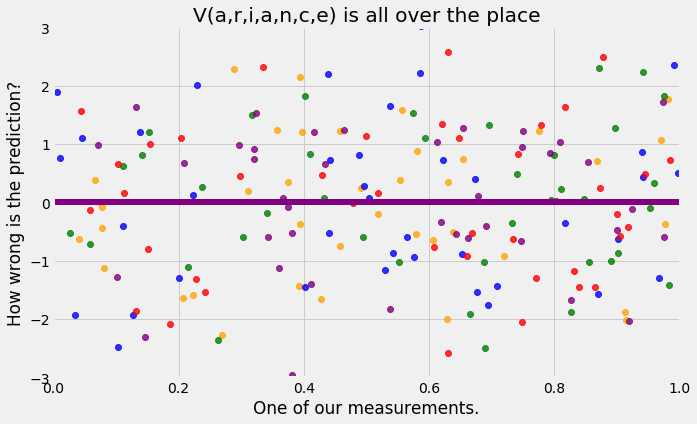

In [45]:
fig4

There isn't an obvious pattern like in the bias chart, the inaccuracy just shows up everwhere.  But dont mistake the fact that the accuracy is unpredictable for a rule that high variance models are worse then high bias models.  Even though the errors in the high bias model showed a pattern, they was still errors.  For these particular simulations the high variance model happened to perform worse but what if I extended these to sample at higher values?  This biased model would get worse while this high variance model wouldn't get much worse.  Both bias and variance can produce innacuracy!

Now, putting the models together again, I'll show you one last thing:


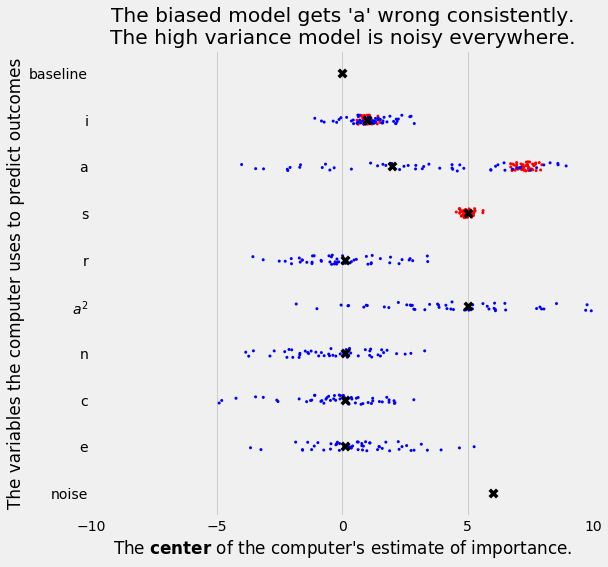

In [46]:
fig

Remember that I chose the terms so that one spelled out "bias" while the other spelled out "variance".  The reason I did that is to give you a memory aid examples to remember what kind of models are biased and what kind have high variance.  The word "bias" is shorter then the word "variance".  So the "bias" model has fewer terms in it, i.e. it ommits an important term.  This term is $a^{2}$.  I used $a^{2}$ in variance to represent the second a, bias only has one a so it doesn't have this term.  There's another thing to keep in mind, if there is a higher order term you aren't considering, you can get bias.  Now, look at "variance".  It has more letters then "bias" so it has more variables in these example.  How did I get more variables?  By including useless terms, i.e. bad predictors.  So if you add too many variables to your model some of them are useless and that's high variance.  This is also called overfitting.  The overfitting is those useless extra variables, because random variations in these terms appear to be useful information, the model fits to those random variations when in truth there is nothing there to fit the model to.  That's why the fitting is so different from case to case.  So hopefully that explanation will give you something you can remember:

##### Too many variables?  Well variance has more letters then bias so that's variance.

##### Not enough variables?  Well bias has fewer letters then variance so that's bias.

## The Code to generate the figures referenced above is past this point

This is a notebook to make some charts showing the bias-variance tradeoff in a multi-variable model.  First step is to make up some data.  For the high bias data we will include independent variables but ommit a higher order term.  For the high variance data we will include many more terms, some of which strongly correlate with each other.

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

colors = ['orange', 'blue','green','red','purple']
cols = ['intercept','i','a','s','r','a2','n','c','e','noise']

In [5]:
def create_data_frame():
    i = np.random.rand(40,1)
    a = np.random.rand(40,1) + 0.02*i
    a2 = a**2
    s = np.random.rand(40,1) + 0.10*a
    r = 0.50*np.random.rand(40,1) + 0.50*a
    n = 0.50*np.random.rand(40,1) + 0.50*a
    c = 0.50*np.random.rand(40,1) + 0.50*a
    e = 0.50*np.random.rand(40,1) + 0.50*a
    df = pd.DataFrame(np.column_stack([a,r,i,a2,n,c,e,s]), columns=['a','r','i','a2','n','c','e','s'])
    df['y'] = 1*df.i + 2*df.a + 5*df.a2 + 5*df.s + 0.1*df.r + 0.1*df.n + 0.1*df.c + 0.1*df.e + 6 * np.random.rand()
    biased_ols = smf.ols('y ~ i + a + s', df).fit()
    high_var_ols = smf.ols('y ~ a + r + i + a2 + n + c + e', df).fit()
    return biased_ols, high_var_ols, df

The high bias model doesn't have the $a^2$ term but doesn't have the terms r, n, c, e, all of which correlate with a but have little predictive ability themselves.

One of the clearest places we can see the difference between high bias and high variance is by looking at graphs of their residuals (i.e. the difference between the predictions and the actual values).

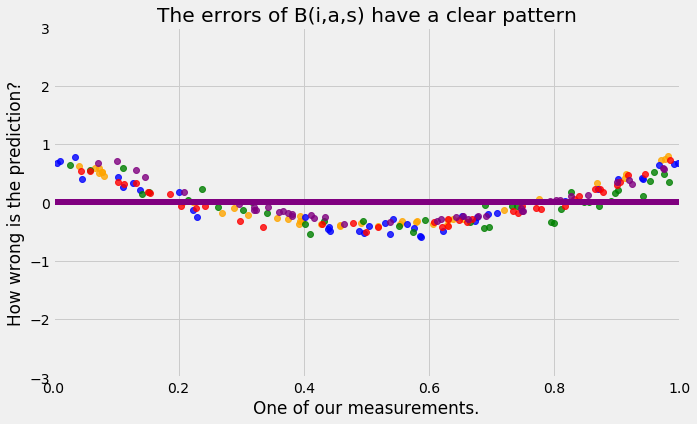

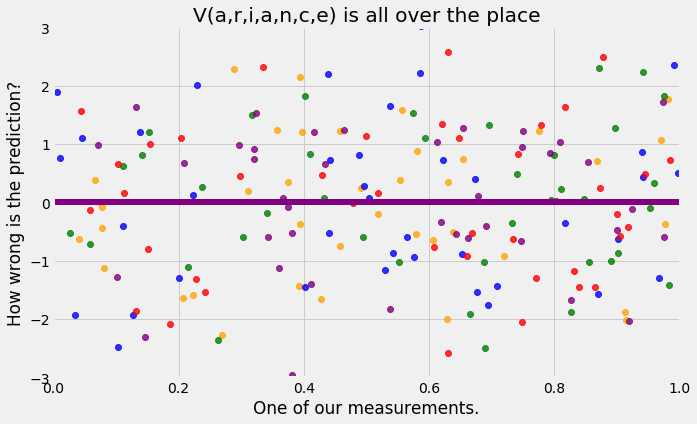

In [25]:
fig3, axes3 = plt.subplots(1,1, figsize=(10,6), sharex=True,sharey=True)
fig4, axes4 = plt.subplots(1,1, figsize=(10,6), sharex=True,sharey=True)
axes3.set_xlim(0,1)
axes3.set_ylim(-3,3)
axes4.set_xlim(0,1)
axes4.set_ylim(-3,3)


bias = pd.DataFrame(columns=cols)
variance = pd.DataFrame(columns=cols)

for x in range(50):    
    biased_ols, high_var_ols, df = create_data_frame()
    df['yhat_biased'] = biased_ols.fittedvalues
    df['resid_biased'] = biased_ols.resid
    df['yhat_high_var'] = high_var_ols.fittedvalues
    df['resid_high_var'] = high_var_ols.resid
    bias = pd.concat([bias, pd.DataFrame(biased_ols.params).transpose()], ignore_index=True)
    variance = pd.concat([variance, pd.DataFrame(high_var_ols.params).transpose()], ignore_index=True)
    if x<5:
        sns.regplot(x="a", y="resid_biased", data=df,ci=None, ax=axes3,color=colors[x], fit_reg=True);
        sns.regplot(x="a", y="resid_high_var", data=df,ci=None, ax=axes4,color=colors[x], fit_reg=True);


axes3.set(ylabel='How wrong is the prediction?',xlabel='One of our measurements.',
          title="The errors of B(i,a,s) have a clear pattern");
axes4.set(ylabel='How wrong is the prediction?',xlabel='One of our measurements.', 
          title="V(a,r,i,a,n,c,e) is all over the place");


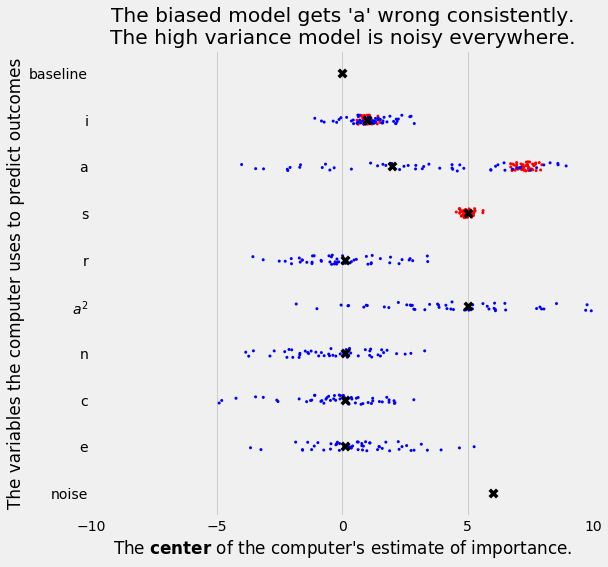

In [34]:
actual = pd.DataFrame([[0, 1, 2, 5, 0.1, 5, 0.1, 0.1, 0.1, 6]], columns=cols);

fig, axes = plt.subplots(1,1, figsize=(8,8), sharex=True,sharey=True);

bias = bias[['intercept','i','a','s','r','a2','n','c','e','noise']];
variance = variance[['intercept','i','a','s','r','a2','n','c','e','noise']];

sns.stripplot(data=bias, orient="h", color='red', jitter=True, ax=axes, size=3);
sns.stripplot(data=variance, orient="h", color='blue', jitter=True, ax=axes, size=3);
sns.stripplot(data=actual, orient='h', color='black', marker="X", ax=axes, size=10);


axes.set(ylabel='The variables the computer uses to predict outcomes',xlabel="The $\mathbf{center}$ of the computer's estimate of importance.", 
          title="The biased model gets 'a' wrong consistently.\nThe high variance model is noisy everywhere.", xlim=(-10,10),
         xticks=[-10,-5,0,5,10],
         yticklabels=['baseline','i','a','s','r', '$a^{2}$','n','c','e','noise']);


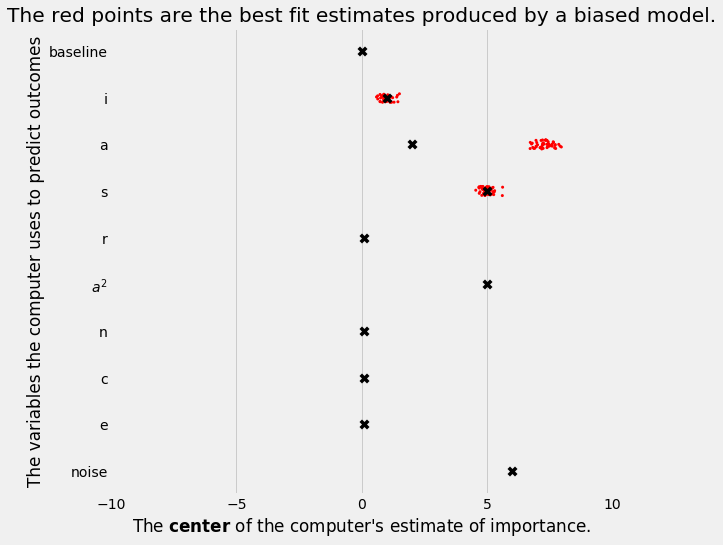

In [38]:
actual = pd.DataFrame([[0, 1, 2, 5, 0.1, 5, 0.1, 0.1, 0.1, 6]], columns=cols);

fig1, axes = plt.subplots(1,1, figsize=(8,8), sharex=True,sharey=True);

bias = bias[['intercept','i','a','s','r','a2','n','c','e','noise']];
variance = variance[['intercept','i','a','s','r','a2','n','c','e','noise']];

sns.stripplot(data=bias, orient="h", color='red', jitter=True, ax=axes, size=3);
# sns.stripplot(data=variance, orient="h", color='blue', jitter=True, ax=axes, size=3);
sns.stripplot(data=actual, orient='h', color='black', marker="X", ax=axes, size=10);


axes.set(ylabel='The variables the computer uses to predict outcomes',xlabel="The $\mathbf{center}$ of the computer's estimate of importance.", 
          title="The red points are the best fit estimates produced by a biased model.", xlim=(-10,10),
         xticks=[-10,-5,0,5,10],
         yticklabels=['baseline','i','a','s','r', '$a^{2}$','n','c','e','noise']);


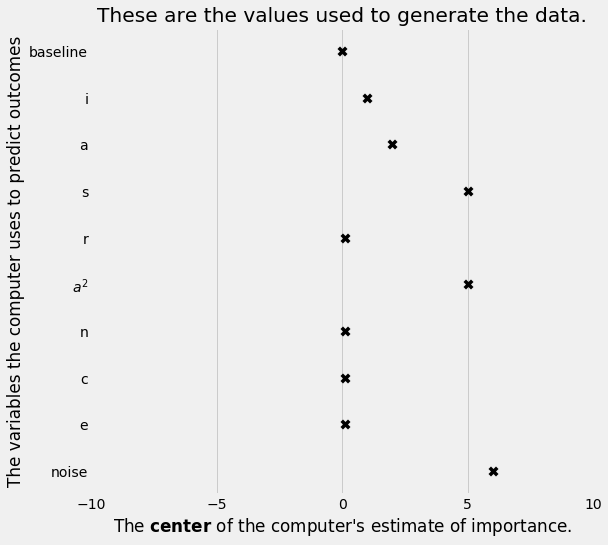

In [31]:
actual = pd.DataFrame([[0, 1, 2, 5, 0.1, 5, 0.1, 0.1, 0.1, 6]], columns=cols);

fig0, axes = plt.subplots(1,1, figsize=(8,8), sharex=True,sharey=True);

bias = bias[['intercept','i','a','s','r','a2','n','c','e','noise']];
variance = variance[['intercept','i','a','s','r','a2','n','c','e','noise']];

# sns.stripplot(data=bias, orient="h", color='red', jitter=True, ax=axes, size=3);
# sns.stripplot(data=variance, orient="h", color='blue', jitter=True, ax=axes, size=3);
sns.stripplot(data=actual, orient='h', color='black', marker="X", ax=axes, size=10);


axes.set(ylabel='The variables the computer uses to predict outcomes',xlabel="The $\mathbf{center}$ of the computer's estimate of importance.", 
          title="These are the values used to generate the data.", xlim=(-10,10),
         xticks=[-10,-5,0,5,10],
         yticklabels=['baseline','i','a','s','r', '$a^{2}$','n','c','e','noise']);

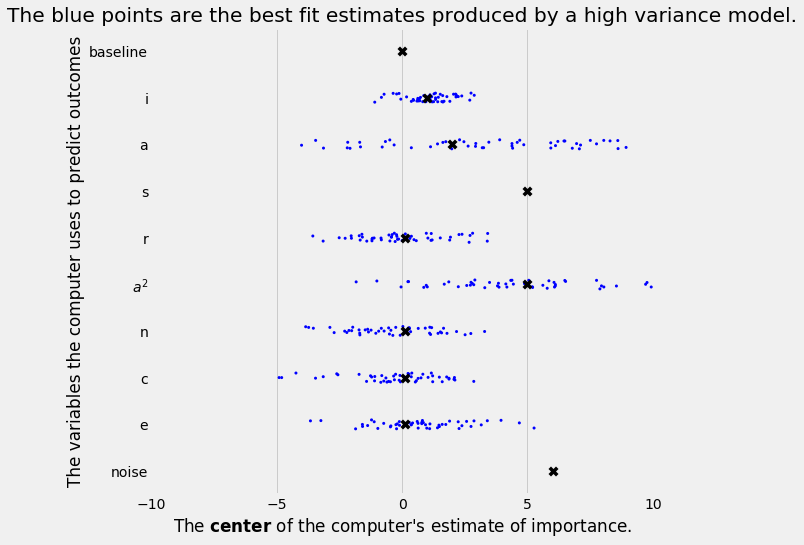

In [43]:
fig2, axes = plt.subplots(1,1, figsize=(8,8), sharex=True,sharey=True);

bias = bias[['intercept','i','a','s','r','a2','n','c','e','noise']];
variance = variance[['intercept','i','a','s','r','a2','n','c','e','noise']];

# sns.stripplot(data=bias, orient="h", color='red', jitter=True, ax=axes5, size=3);
sns.stripplot(data=variance, orient="h", color='blue', jitter=True, ax=axes, size=3);
sns.stripplot(data=actual, orient='h', color='black', marker="X", ax=axes, size=10);


axes.set(ylabel='The variables the computer uses to predict outcomes',xlabel="The $\mathbf{center}$ of the computer's estimate of importance.", 
          title="The blue points are the best fit estimates produced by a high variance model.", xlim=(-10,10),
         xticks=[-10,-5,0,5,10],
         yticklabels=['baseline','i','a','s','r', '$a^{2}$','n','c','e','noise']);